In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Bozu_in_Andromeda(overlay_img, bg_img):
    # Making Bozu's image smaller in dimensions
    overlay_img = cv2.resize(overlay_img, (0, 0), fx=0.5, fy=0.5)
    # Assigning the starting values to place Bozu at the center of the Andromeda
    starting_y = bg_img.shape[0]//2 - overlay_img.shape[0]//2
    starting_x = bg_img.shape[1]//2 - overlay_img.shape[1]//2
    # Adding Bozu's image in Andromeda
    bg_img[starting_y:overlay_img.shape[0]+starting_y,
           starting_x:overlay_img.shape[1]+starting_x] = overlay_img
    # Showing image
    plt.title('Bozu in Andromeda')
    plt.imshow(bg_img)
    plt.show()
    # Saving image
    cv2.imwrite('Bozu in Andromeda.jpg', bg_img)


In [3]:
def clip(broken_img):
    try: # this runs if the image is an rgb image with 3 layers
        for rgb_layer in range(3): # for red, green, and blue layers within the image
            layer = broken_img[:, :, rgb_layer]
            for row in range(layer.shape[0]): # for every row in that layer
                for col in range(layer.shape[1]): # for every # in that row in that column
                    if layer[row][col] < 0:
                        layer[row][col] = 0 
                    elif layer[row][col] > 255:
                        layer[row][col] = 255
            broken_img[:, :, rgb_layer] = layer # set the broken layer to the newly corrected layer
    except: # this runs if image is actually just an array of 3 numbers
        for i in range(len(broken_img)):
            if broken_img[i] < 0:
                broken_img[i] = 0
            elif broken_img[i] > 255:
                broken_img[i] = 255

    plt.title('Clipped Image')
    plt.imshow(broken_img)
    plt.show()
    
    return broken_img


In [4]:
def contrast(image, alpha):
    amp_img = image * alpha # multiplying each value by alpha
    scaled_img = amp_img/255 # making sure every value in array is between 0-1

    plt.imshow(scaled_img)
    plt.title('Contrast Bozu')
    plt.show()


In [5]:
def add_brightness(image, beta):

    amp_img = image + beta  # adding beta to each value
    new_image = amp_img/255

    # for some reason the whites in the eyes turn gray -- this corrects that
    white_indx = np.where(image == 255)
    zipped_indx = list(zip(white_indx[0], white_indx[1], white_indx[2]))
    for i in range(len(zipped_indx)):
        new_image[zipped_indx[i][0], zipped_indx[i][1], zipped_indx[i][2]] = 255

    plt.imshow(new_image)
    plt.title('Brightness Bozu')
    plt.show


In [6]:
def add_brightness_ugly(image, beta):
    # this is just an uglier, less efficent version of the add_brightness function
    new_image = np.zeros(image.shape, image.dtype) # creating new image
    for layer in range(image.shape[0]):
        for row in range(image.shape[1]):
            for col in range(image.shape[2]):
                new_image[layer, row, col] = image[layer, row, col] + beta
                if new_image[layer, row, col] > 255:
                    new_image[layer, row, col] = 255
                elif layer[row][col] < 0:
                    layer[row][col] = 0
                    
    # for some reason the whites in the eyes turn gray -- this corrects that
    white_indx = np.where(image == 255)
    zipped_indx = list(zip(white_indx[0], white_indx[1], white_indx[2]))
    for i in range(len(zipped_indx)):
        new_image[zipped_indx[i][0], zipped_indx[i]
                  [1], zipped_indx[i][2]] = 255

    plt.imshow(new_image)
    plt.show


In [105]:
def flip_horizontal(img):
    img[:, :, 0] = img[:, ::-1, 0]
    img[:, :, 1] = img[:, ::-1, 1]
    img[:, :, 2] = img[:, ::-1, 2]
    plt.title('Horizontally flipped Bozu')
    plt.imshow(img)
    plt.show()
    cv2.imwrite('Horizontal_Bozu.png', img)
    return img


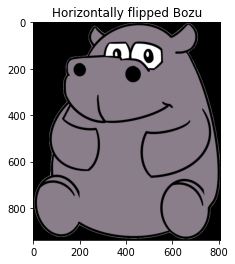

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [106]:
def flip_vertical(img):
    img[:, :, 0] = img[::-1, :, 0]
    img[:, :, 1] = img[::-1, :, 1]
    img[:, :, 2] = img[::-1, :, 2]
    plt.title('Vertically flipped Bozu')
    plt.imshow(img)
    cv2.imwrite('Vertical_Bozu.png', img)
    plt.show()
    return img


In [86]:
def apply_threshold(image, threshold):
    # Converting values to binary digits based on theshold
    img = np.where(image >= threshold, 1.0, image)
    img = np.where(image < threshold, 0.0, image)

    plt.title('Bozu Thresholded')
    plt.imshow(img)
    plt.show()
    return img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


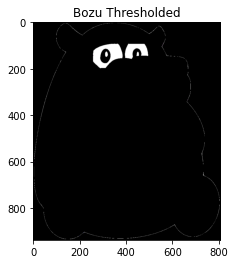

Thank you for using our program!


In [85]:
bozu_img = cv2.imread('Bozu.png')
andromeda_img = cv2.imread('Andromeda.jpg')
choice = input("Enter 1 to flip Bozu horizontally\n2 to flip Bozu vertically\n3 to clip Bozu\n4 to contrast Bozu\n5 to add brightness to Bozu,\n6 to take Bozu to Andromeda,\n7 to theshold Bozu,\nor 8 to exit\nYour choice: ")
while choice != '8':
    if choice == '1':
        flip_horizontal(bozu_img)
    elif choice == '2':
        flip_vertical(bozu_img)
    elif choice == '3':
        clipped_img = clip(bozu_img)
    elif choice == '4':
        alpha = float(input("Enter the value of alpha: "))
        contrasted_img = contrast(bozu_img, alpha)
    elif choice == '5':
        beta = float(input("Enter the value of beta: "))
        brightened_img = add_brightness(bozu_img, beta)
    elif choice == '6':
        Bozu_in_Andromeda(bozu_img, andromeda_img)
    elif choice == '7':
        threshold = float(input('Enter threshold value: '))
        apply_threshold(bozu_img, threshold)
    else:
        print("Invalid input")
    choice = input("Enter 1 to flip Bozu horizontally\n2 to flip Bozu vertically\n3 to clip Bozu\n4 to contrast Bozu\n5 to add brightness to Bozu,\n6 to take Bozu to Andromeda,\n7 to theshold Bozu,\nor 8 to exit\nYour choice: ")
print("Thank you for using our program!")
